# 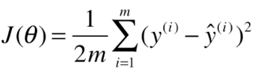

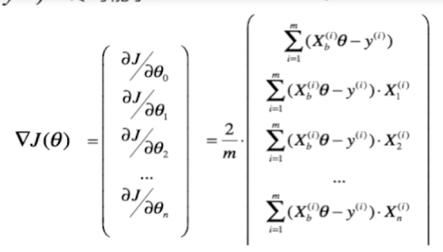

In [158]:
### Gradient descent in multiple linear regression

import numpy as np
import matplotlib.pyplot as plt



np.random.seed(666)
x = 2 * np.random.random(size=3)
y = x * 3. + 4. + np.random.normal(size=3)
X = x.reshape(-1, 1)
X

array([[1.40087424],
       [1.68837329],
       [1.35302867]])

In [159]:
y

array([8.167261  , 8.86570777, 6.6295138 ])

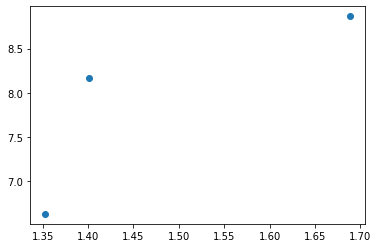

In [160]:
plt.scatter(x,y)
plt.show()

In [161]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')


In [162]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    
    res[0] = np.sum(X_b.dot(theta) - y)
    
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    
    
    
    return res * 2 / len(X_b)

In [163]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        cur_iter += 1

    return theta

In [164]:
X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1,1)])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [165]:
theta

array([0.77967875, 4.80277483])